# Part2: data analysis

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
ACTION_201602_FILE = "Jdata/JData_Action_201602.csv"
ACTION_201603_FILE = "Jdata/JData_Action_201603.csv"
ACTION_201604_FILE = "Jdata/JData_Action_201604.csv"
COMMENT_FILE = "Jdata/JData_Comment.csv"
PRODUCT_FILE = "Jdata/JData_Product.csv"
USER_FILE = "Jdata/JData_User.csv"
USER_TABLE_FILE = "Jdata/User_table.csv"
ITEM_TABLE_FILE = "Jdata/Item_table.csv"

- We want to see the purchasing action from Monday to Sunday.

In [19]:
#type=4 means buy action, we extract here
def get_from_action_data(fname, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["user_id", "sku_id", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("done!")

    df_ac = pd.concat(chunks, ignore_index=True)
    df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["user_id", "sku_id", "time"]]

- generate purchashing action data from Feburary to April.

In [20]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)

done!
done!
done!


In [7]:
df_ac.head()

,user_id,sku_id,time
0,269365.0,166345,2016-02-01 00:01:00
1,235443.0,36692,2016-02-01 00:02:00
2,247689.0,9112,2016-02-01 00:03:00
3,273959.0,102034,2016-02-01 00:05:00
4,226791.0,163550,2016-02-01 00:06:00


In [8]:
# change time format to datetime
df_ac['time'] = pd.to_datetime(df_ac['time'])

# set Monday to 1,Tuesday to 2...Sunday to 7
df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)

In [9]:
# from Monday to Sunday we count number of users daily
df_user = df_ac.groupby('time')['user_id'].nunique()
df_user = df_user.to_frame().reset_index()
df_user.columns = ['weekday', 'user_num']

In [10]:
# from Monday to Sunday we count number of items daily
df_item = df_ac.groupby('time')['sku_id'].nunique()
df_item = df_item.to_frame().reset_index()
df_item.columns = ['weekday', 'item_num']

In [11]:
# from Monday to Sunday we count number of records
df_ui = df_ac.groupby('time', as_index=False).size()
df_ui = df_ui.to_frame().reset_index()
df_ui.columns = ['weekday', 'user_item_num']

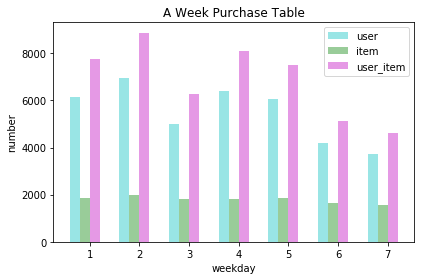

In [12]:
bar_width = 0.2
opacity = 0.4

plt.bar(df_user['weekday'], df_user['user_num'], bar_width, 
        alpha=opacity, color='c', label='user')
plt.bar(df_item['weekday']+bar_width, df_item['item_num'], 
        bar_width, alpha=opacity, color='g', label='item')
plt.bar(df_ui['weekday']+bar_width*2, df_ui['user_item_num'], 
        bar_width, alpha=opacity, color='m', label='user_item')

plt.xlabel('weekday')
plt.ylabel('number')
plt.title('A Week Purchase Table')
plt.xticks(df_user['weekday'] + bar_width * 3 / 2., (1,2,3,4,5,6,7))
plt.tight_layout() 
plt.legend(prop={'size':10})

## analysis of items

In [13]:
# from Monday to Sunday we count number of item categories daily

def get_from_action_data(fname, chunk_size=100000):
    reader = pd.read_csv(fname, header=0, iterator=True)
    chunks = []
    loop = True
    while loop:
        try:
            chunk = reader.get_chunk(chunk_size)[
                ["cate", "brand", "type", "time"]]
            chunks.append(chunk)
        except StopIteration:
            loop = False
            print("Iteration is stopped")

    df_ac = pd.concat(chunks, ignore_index=True)
    df_ac = df_ac[df_ac['type'] == 4]

    return df_ac[["cate", "brand", "type", "time"]]

- show categories and brands customers purchased from Monday to Friday

In [21]:
df_ac = []
df_ac.append(get_from_action_data(fname=ACTION_201602_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201603_FILE))
df_ac.append(get_from_action_data(fname=ACTION_201604_FILE))
df_ac = pd.concat(df_ac, ignore_index=True)

done!
done!
done!


In [15]:
df_ac.head()

,cate,brand,type,time
0,9,306,4,2016-02-01 00:01:00
1,4,174,4,2016-02-01 00:02:00
2,5,78,4,2016-02-01 00:03:00
3,5,78,4,2016-02-01 00:05:00
4,4,306,4,2016-02-01 00:06:00


In [16]:
# change time format to datetime
df_ac['time'] = pd.to_datetime(df_ac['time'])

# set Monday to 1,Tuesday to 2...Sunday to 7
df_ac['time'] = df_ac['time'].apply(lambda x: x.weekday() + 1)

In [17]:
# count categorical items
df_ac.groupby(df_ac['cate']).count()

,cate,brand,type,time
cate,,,,
4,9326,9326,9326,9326
5,8138,8138,8138,8138
6,6982,6982,6982,6982
7,6214,6214,6214,6214
8,13281,13281,13281,13281
9,4104,4104,4104,4104
10,189,189,189,189
11,18,18,18,18


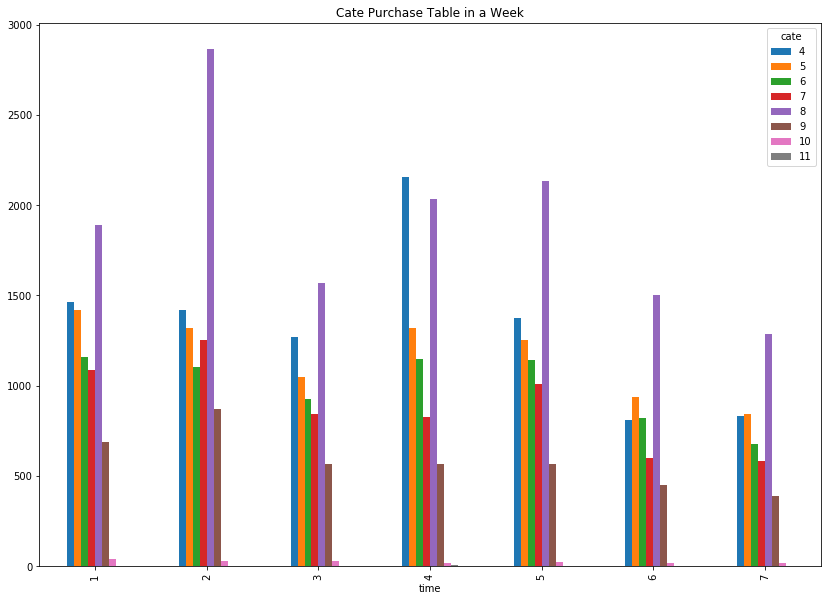

In [18]:
df_product = df_ac['brand'].groupby([df_ac['time'],df_ac['cate']]).count()
df_product=df_product.unstack()
df_product.plot(kind='bar',title='Cate Purchase Table in a Week',figsize=(14,10))